# LDA Topic Modeling with sklearn and pyLDAvis

This notebook demonstrates how to:
1. Preprocess text data
2. Train an LDA model using sklearn
3. Visualize topics using pyLDAvis"

In [1]:
import numpy as np
import pandas as pd

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis

# import pyLDAvis.lda_model
import spacy
from nltk.corpus import stopwords
import nltk
from typing import List
import yaml

import data_preprocessing
import data_processing_text_html
import lda_model_gensim
import lda_model_sklearn
import main
import utils

from pathlib import Path
from tqdm import tqdm
import time
import re

# # Download required NLTK data
# nltk.download("stopwords")
# nltk.download("punkt")
# nltk.download("averaged_perceptron_tagger")
# nltk.download("wordnet")

/home/public/avaishna/financial_topic_modeling/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
data = pd.read_csv("ipo_s1_filing_final.csv")
data.head()

,offer_date,IPO_name,ticker,CIK,CIK2,S1_Filing_Date,filename,company_name,form_type,filing_date,url
0,20000321,Aclara Biosciences Inc,ACLA,1067588,1067588,20JAN2000,0000891618-00-000185.txt,ACLARA BIOSCIENCES INC,S-1,20JAN2000,https://www.sec.gov/Archives/edgar/data/106758...
1,20001113,Adolor Corp,ADLR,1076167,1076167,08FEB2000,0000950109-00-000310.txt,ADOLOR CORP,S-1,08FEB2000,https://www.sec.gov/Archives/edgar/data/107616...
2,20010607,Alliance Data Systems Corp,ADS,1101215,1101215,13JAN2000,0000912057-00-001201.txt,ALLIANCE DATA SYSTEMS CORP,S-1,13JAN2000,https://www.sec.gov/Archives/edgar/data/110121...
3,20000327,Allos Therapeutics Inc,ALTH,1097264,1097264,26JAN2000,0001035704-00-000023.txt,ALLOS THERAPEUTICS,S-1,26JAN2000,https://www.sec.gov/Archives/edgar/data/109726...
4,20000807,America Online Latin America,AOLA,1100395,1100395,20JAN2000,0000950130-00-000161.txt,AMERICA ONLINE LATIN AMERICA INC,S-1,20JAN2000,https://www.sec.gov/Archives/edgar/data/110039...


In [3]:
# # Check the count of distinct urls
# data["url"].nunique()

In [4]:
# # Count the distinct urls and their counts
# url_counts = data["url"].value_counts()
# url_counts
# # Get the top 10 urls with the most counts
# top_10_urls = url_counts.head(10)
# top_10_urls

In [6]:
# import os

# # Count number of documents in the raw_data_files directory
# num_docs = len(os.listdir("raw_data_files"))
# print(f"Number of documents in the raw_data_files directory: {num_docs}")

In [7]:
# urls = data["url"].tolist()

# # Save the list of urls to a text file
# with open("data_url_csv.txt", "w") as f:
#     for url in urls:
#         f.write(url + "\n")

In [ ]:
# # Load configuration
# config = main.load_config("config.yaml")
# num_docs = 50

# # Load your documents here
# # For example:
# # documents = pd.read_csv('your_data.csv')['text_column'].tolist()
# data = "./data_url.txt"
# documents = main.load_data(data, num_docs)

# # Preprocess documents using existing function
# processed_texts, tfidf_vectorizer, tfidf_matrix = (
#     data_preprocessing.pre_processing_sklearn(documents, config=config["preprocessing"])
# )

# print(f"Vocabulary size: {len(tfidf_vectorizer.get_feature_names_out())}")
# print(f"Document-term matrix shape: {tfidf_matrix.shape}")

In [3]:
# # # Train LDA model using existing function
# # lda = lda_model_sklearn.model_training(
# #     topic_num=config["lda"]["sklearn"]["n_components"],
# #     doc_term_matrix=tfidf_matrix,
# #     model_params=config["lda"]["sklearn"],
# # )

# models, perplexity_scores = lda_model_sklearn.optimize_topic_number(
#     tfidf_matrix,
#     config["lda"]["topic_range"],
#     config["lda"]["sklearn"],
# )
# best_idx = perplexity_scores.index(min(perplexity_scores))
# best_num_topics = config["lda"]["topic_range"]["start"] + (
#     best_idx * config["lda"]["topic_range"]["step"]
# )
# lda_model = models[best_idx]

In [4]:
# from typing import Dict, List
# from matplotlib import pyplot as plt


# def plot_perplexity_scores(
#     topic_range: Dict,
#     perplexity_scores: List[float],
#     # output_dir: Path,
# ):
#     """Plot and save perplexity scores vs number of topics."""
#     plt.figure(figsize=(10, 6))
#     plt.plot(
#         range(topic_range["start"], topic_range["limit"], topic_range["step"]),
#         perplexity_scores,
#         marker="o",
#     )
#     plt.xlabel("Number of Topics")
#     plt.ylabel("Perplexity Score")
#     plt.title("Perplexity Score vs Number of Topics")
#     plt.grid(True)


# plot_perplexity_scores(
#     config["lda"]["topic_range"],
#     perplexity_scores,
# )

In [5]:
# # Print topics using existing function
# topics = print_topics(lda, tfidf_vectorizer)
# for idx, topic in enumerate(topics):
#     print(f"Topic {idx}: {topic}")

In [6]:
# # Plot pyLDAvis visualization
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.lda_model.prepare(lda, tfidf_matrix, tfidf_vectorizer)
# pyLDAvis.display(vis)

# Gensim

In [3]:
# Load configuration
config = utils.load_config("config.yaml")
num_docs = 200
num_cores = 16
batch_size = 50
# Load your documents here
# For example:
# documents = pd.read_csv('your_data.csv')['text_column'].tolist()
data = "./data_url.txt"
# documents = utils.load_files(num_files=num_docs)

documents_generator = utils.load_files_in_batches(
    batch_size=batch_size,
    num_docs=num_docs,
)

id2word, texts, tfidf_corpus = data_preprocessing.pre_processing_gensim(
    documents_generator=documents_generator,
    config=config["preprocessing"],
    num_cores=num_cores,
)

2025-04-11 14:09:02,263 - data_preprocessing - INFO - Added 5 stopwords from stopwords/additional_stopwords.txt
2025-04-11 14:09:02,264 - data_preprocessing - INFO - Added 29 stopwords from stopwords/financial_stopwords.txt
2025-04-11 14:09:02,266 - data_preprocessing - INFO - Added 121 stopwords from stopwords/generic_stopwords.txt
2025-04-11 14:09:02,266 - data_preprocessing - INFO - Total number of stopwords: 233


2025-04-11 14:09:02,848 - data_preprocessing - INFO - Pre-processing the documents
2025-04-11 14:09:02,855 - utils - INFO - Found 2311 .txt files in directory: raw_data_files
2025-04-11 14:09:02,856 - utils - INFO - Using 200 files for processing
Processing documents: 100%|██████████| 50/50 [01:19<00:00,  1.59s/it]
2025-04-11 14:10:23,251 - data_preprocessing - INFO - Completed parallel preprocessing of 50 documents
2025-04-11 14:10:23,252 - data_preprocessing - INFO - Parallel processing completed in 80.13 seconds
2025-04-11 14:10:23,252 - data_preprocessing - INFO - Average time per document: 1.60 seconds
Processing documents: 100%|██████████| 50/50 [01:23<00:00,  1.66s/it]
2025-04-11 14:12:28,984 - data_preprocessing - INFO - Completed parallel preprocessing of 50 documents
2025-04-11 14:12:28,985 - data_preprocessing - INFO - Parallel processing completed in 84.03 seconds
2025-04-11 14:12:28,986 - data_preprocessing - INFO - Average time per document: 1.68 seconds
Processing docume

In [4]:
import psutil

# Check memory usage
print(f"Memory usage: {psutil.Process().memory_info().rss / 1024 / 1024:.2f} MB")

Memory usage: 3159.35 MB


In [6]:
print("Number of unique tokens: %d", len(id2word))

Number of unique tokens: %d 322349


In [12]:
topic_model = lda_model_gensim.model_training(
    # config["lda"]["gensim"]["num_topics"],
    topic_num=10,
    corpus=tfidf_corpus,
    id2word=id2word,
    model_params=config["lda"]["gensim"],
)

/home/public/avaishna/financial_topic_modeling/.venv/lib/python3.11/site-packages/gensim/models/ldamodel.py:850: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [13]:
# Check memory usage
print(f"Memory usage: {psutil.Process().memory_info().rss / 1024 / 1024:.2f} MB")

Memory usage: 3306.44 MB


In [15]:
# Print the perplexity score and coherence score
perplexity_score, coherence_score = lda_model_gensim.performance_metrics(
    model=topic_model,
    corpus=tfidf_corpus,
    texts=texts,
    id2word=id2word,
)

print(f"Perplexity score: {perplexity_score}")
print(f"Coherence score: {coherence_score}")

Perplexity score: -18.06627460391903
Coherence score: {'c_v': 0.4886299251245152}


In [14]:
import pyLDAvis.gensim

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model, tfidf_corpus, id2word)
pyLDAvis.display(vis)

In [18]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))

    return float(len(intersection)) / float(len(union))

In [ ]:
# Considering 1-15 topics, as the last is cut off
num_topics = list(range(16)[1:])
num_keywords = 20

LDA_models = {}
LDA_topics = {}
for i in tqdm(num_topics, desc="Training LDA models"):
    LDA_models[i] = lda_model_gensim.model_training(
        topic_num=i,
        corpus=tfidf_corpus,
        id2word=id2word,
        model_params=config["lda"]["gensim"],
    )

    shown_topics = LDA_models[i].show_topics(
        num_topics=i,
        num_words=num_keywords,
        formatted=False,
    )
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [ ]:
LDA_stability = {}
for i in range(0, len(num_topics) - 1):
    jaccard_sims = []
    for t1, topic1 in enumerate(
        LDA_topics[num_topics[i]]
    ):  # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(
            LDA_topics[num_topics[i + 1]]
        ):  # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))

        jaccard_sims.append(sims)

    LDA_stability[num_topics[i]] = jaccard_sims

mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
# Update the below code to be compatible with tqdm

coherences = []
for i in tqdm(num_topics[:-1], desc="Calculating coherence scores"):
    coherence = gensim.models.CoherenceModel(
        model=LDA_models[i],
        texts=texts,
        dictionary=id2word,
        coherence="c_v",
    ).get_coherence()
    coherences.append(coherence)

In [ ]:
coh_sta_diffs = [
    coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]
]  # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[
    0
]  # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label="Average Topic Overlap")
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label="Topic Coherence")

ax.axvline(x=ideal_topic_num, label="Ideal Number of Topics", color="black")
ax.axvspan(
    xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor="grey"
)

y_max = max(max(mean_stabilities), max(coherences)) + (
    0.10 * max(max(mean_stabilities), max(coherences))
)
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1] - 1])

ax.axes.set_title("Model Metrics per Number of Topics", fontsize=25)
ax.set_ylabel("Metric Level", fontsize=20)
ax.set_xlabel("Number of Topics", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [3]:
# Read the text file
# file = "html_text.txt"
file = "/home/public/avaishna/financial_topic_modeling/raw_data_files/0000889812-00-000150.txt"
with open(file, "r", encoding="utf-8") as f:
    text = f.read()

print(f"First 100 characters of the text: {text[:100]}")

# Load spacy model
config = utils.load_config("config.yaml")
dictionary, bow_corpus, tfidf_corpus, texts_bigrams_trigrams = (
    data_processing_text_html.pre_processing_gensim(
        config=config,
        text=text,
        debug=True,
    )
)

First 100 characters of the text: -----BEGIN PRIVACY-ENHANCED MESSAGE-----
Proc-Type: 2001,MIC-CLEAR
Originator-Name: webmaster@www.se
Added 6 stopwords from stopwords/additional_stopwords.txt
Added 35 stopwords from stopwords/financial_stopwords.txt
Added 121 stopwords from stopwords/generic_stopwords.txt
Total number of stopwords: 240
Allowed postags: ['NOUN', 'ADJ', 'VERB', 'ADV', 'PROPN']
First 10 tokens after basic preprocessing: ['sgml', 'accession', 'number', 'conform', 'submission', 'type', 'public', 'document', 'count', 'file']

First 10 tokens after tokenization: ['sgml', 'accession', 'number', 'conform', 'submission', 'type', 'public', 'document', 'count', 'file']

First 10 tokens after removing numbers: ['sgml', 'accession', 'number', 'conform', 'submission', 'type', 'public', 'document', 'count', 'file']

First 10 tokens after removing stopwords: ['sgml', 'accession', 'number', 'conform', 'submission', 'type', 'public', 'document', 'count', 'file']

First 10 tokens after r

In [3]:
dictionary.token2id

{'abet': 0,
 'ability': 1,
 'able': 2,
 'abroad': 3,
 'abrupt': 4,
 'absence': 5,
 'absent': 6,
 'absolute': 7,
 'absolute_dollar': 8,
 'absorb': 9,
 'abstain': 10,
 'abuse': 11,
 'accelerate': 12,
 'accelerated': 13,
 'acceleration': 14,
 'accept': 15,
 'acceptable': 16,
 'acceptance': 17,
 'access': 18,
 'accessibility': 19,
 'accessible': 20,
 'accident': 21,
 'accommodate': 22,
 'accompany': 23,
 'accomplish': 24,
 'accord': 25,
 'accordance': 26,
 'accordingly': 27,
 'account': 28,
 'accountability': 29,
 'accountable': 30,
 'accountant': 31,
 'accounting': 32,
 'accredit_investor': 33,
 'accredited_investor': 34,
 'accretion': 35,
 'accretive': 36,
 'accrual': 37,
 'accrue': 38,
 'accumulate': 39,
 'accumulate_deficit': 40,
 'accuracy': 41,
 'accurate': 42,
 'accurately': 43,
 'accusation': 44,
 'achieve': 45,
 'achievement': 46,
 'achievement_consecutive_trading': 47,
 'acknowledge': 48,
 'acquire': 49,
 'acquirer': 50,
 'acquisition': 51,
 'act': 52,
 'acting': 53,
 'action': 5

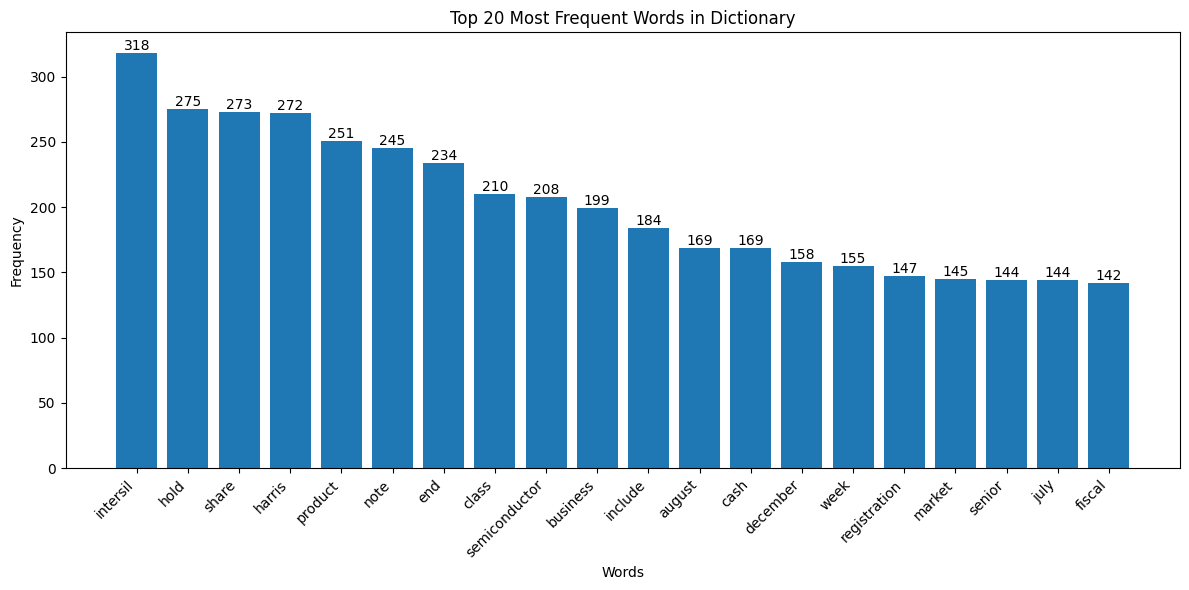

In [4]:
import matplotlib.pyplot as plt


def plot_word_frequency_distribution(
    dictionary,
    top_n: int,
) -> None:
    """
    Plot the distribution of word frequencies in the dictionary.

    Args:
        dictionary: Gensim Dictionary object
        top_n: Number of top words to plot
    """

    # Get word frequencies
    word_freq = [
        (dictionary.id2token[word_id], freq) for word_id, freq in dictionary.cfs.items()
    ]

    # Sort by frequency and get top N
    word_freq.sort(key=lambda x: x[1], reverse=True)
    top_words = word_freq[:top_n]

    # Create the plot
    plt.figure(figsize=(12, 6))
    words, freqs = zip(*top_words)

    # Create bar plot
    bars = plt.bar(range(len(words)), freqs)

    # Customize the plot
    plt.title(f"Top {top_n} Most Frequent Words in Dictionary")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(range(len(words)), words, rotation=45, ha="right")

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
        )

    # Adjust layout to prevent label cutoff
    plt.tight_layout()


plot_word_frequency_distribution(dictionary, 20)

In [5]:
# lda_model = lda_model_gensim.model_training(
#     topic_num=config["lda"]["gensim"]["num_topics"],
#     corpus=tfidf_corpus,
#     id2word=dictionary,
#     model_params=config["lda"]["gensim"],
# )

num_topics = 5
chunksize = 100
iterations = 100
passes = 20
eval_every = 1

lda_model = gensim.models.LdaModel(
    corpus=tfidf_corpus,
    id2word=dictionary,
    chunksize=chunksize,
    alpha="auto",
    eta="auto",
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
)

/home/public/avaishna/financial_topic_modeling/.venv/lib/python3.11/site-packages/gensim/models/ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [6]:
import pyLDAvis.gensim

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, tfidf_corpus, dictionary)
pyLDAvis.display(vis)

In [9]:
nltk.stem.WordNetLemmatizer().lemmatize("was", "v")

'be'

In [2]:
import gensim

print(gensim.__version__)

4.3.2
